In [73]:
from matplotlib import pyplot as plt, rcParams, animation
import scipy, seaborn as sns, matplotlib
from scipy.cluster import hierarchy as hc
matplotlib.rc('animation', html='html5')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=5, linewidth=110, suppress=True)
import warnings
warnings.filterwarnings("ignore")

import FA
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
import os, math, pandas as pd, pickle, datetime, time
from pandas_summary import DataFrameSummary
from IPython.display import HTML, display
from treeinterpreter import treeinterpreter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from sklearn import metrics, ensemble, preprocessing
from sklearn.ensemble import _forest as forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer as Imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [75]:
df = pd.read_excel('df_final.xlsx')
df.shape

(1953, 149)

In [76]:
df.head(2)

,file_name,ticker,date,industry,CBOE,CBOEDayAfter,CBOEDayBefore,TopicShare-1,TopicShare0,TopicShare1,...,sent61,sent62,sent63,sent64,sent65,sent66,sent67,sent68,Mkt_Reaction_Absolute,Mkt_Reaction_Percent
0,2022-Apr-07-CAG.N-137610928086-transcript.txt,CAG.N,2022-04-07,"Food, Beverage & Tobacco",23.82,22.34,24.78,0.418798,0.358483,0.054561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,0.004659
1,2022-Apr-07-LW.N-140326069706-transcript.txt,LW.N,2022-04-07,"Food, Beverage & Tobacco",23.82,22.34,24.78,0.354167,0.384199,0.106872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.89,0.097452


In [77]:
df.dropna(inplace=True) #drop 3 rows
df.shape

(1950, 149)

In [78]:
df.drop(['file_name','date','CBOEDayAfter','Mkt_Reaction_Absolute'], axis=1, inplace=True)

#### Transforming dataset 

In [79]:
df_new, y, nas = FA.proc_df(df=df, y_fld='Mkt_Reaction_Percent')
df_new.shape

(1950, 144)

In [80]:
df_new.head(2)

,ticker,industry,CBOE,CBOEDayBefore,TopicShare-1,TopicShare0,TopicShare1,TopicShare2,TopicShare3,TopicShare4,...,sent59,sent60,sent61,sent62,sent63,sent64,sent65,sent66,sent67,sent68
0,74,12,23.82,24.78,0.418798,0.358483,0.054561,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,282,12,23.82,24.78,0.354167,0.384199,0.106872,0.002435,0.0,0.01434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df_new.describe()

,ticker,industry,CBOE,CBOEDayBefore,TopicShare-1,TopicShare0,TopicShare1,TopicShare2,TopicShare3,TopicShare4,...,sent59,sent60,sent61,sent62,sent63,sent64,sent65,sent66,sent67,sent68
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,...,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
mean,247.804103,12.915897,27.817210,27.971415,0.487719,0.321816,0.027553,0.001055,0.017420,0.015481,...,0.002944,0.011172,0.002132,0.001182,0.004977,-0.000065,-0.000015,0.003025,0.002120,0.005302
std,142.542506,6.901127,4.227302,4.336686,0.096589,0.109910,0.041720,0.001403,0.053197,0.031381,...,0.048024,0.103177,0.040723,0.040662,0.160282,0.000823,0.000091,0.047870,0.042065,0.072942
min,1.000000,1.000000,19.730000,18.690000,0.106464,0.090171,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.991943,-0.044354,-0.997154,-0.999829,-0.010516,-0.001257,0.000000,0.000000,-0.661921
25%,124.250000,7.000000,24.410000,24.410000,0.429645,0.251045,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249.000000,13.000000,26.870000,27.070000,0.490837,0.304981,0.007038,0.000512,0.000000,0.005139,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,372.000000,18.000000,32.000000,31.900000,0.554655,0.372100,0.042175,0.001436,0.000000,0.017972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,494.000000,25.000000,38.940000,38.940000,0.762606,0.882129,0.291139,0.010984,0.401374,0.471274,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.999260,1.000000,1.000000


---

### I. Random forest

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((1560, 144), (1560,))

In [90]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 7, 10],
    'max_features': ['sqrt', 'log2', 0.5],
    'min_samples_leaf': [3, 5, 7]
}

#Perform cross-validation
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Select the best hyperparameters
best_params = grid_search.best_params_

#Train the model with the best hyperparameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

#Evaluate the model
y_pred = rf_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.5f}".format(mse))

Mean Squared Error: 0.00440


In [91]:
def rmse(pred,y): return math.sqrt(((pred-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    res = np.round(res,3)
    print(f'RMSE train: {res[0]:.5f}, RMSE test: {res[1]:.5f}, R2 train: {res[2]}, R2 test: {res[3]}')

In [92]:
print_score(rf_best)

RMSE train: 0.05500, RMSE test: 0.06600, R2 train: 0.333, R2 test: 0.035


In [93]:
y_std = y.std()
y_std

0.06762044673371834

In [94]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 7, 'n_estimators': 30}


In [95]:
cv_results = grid_search.cv_results_
print("Performance on Validation Folds:")
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Mean Score:", mean_score, "- Parameters:", params)

Performance on Validation Folds:
Mean Score: 0.0038348600570390135 - Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 10}
Mean Score: 0.004110780574664274 - Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 20}
Mean Score: 0.00897841574092162 - Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 30}
Mean Score: -0.0065752660559377455 - Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 10}
Mean Score: 0.0036152063489685916 - Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 20}
Mean Score: 0.01026072725335272 - Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 30}
Mean Score: 0.006596285745699393 - Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'n_estimators': 10}
Mean Score: 0.011649122847945215 - Parameters: {

### Feature importances

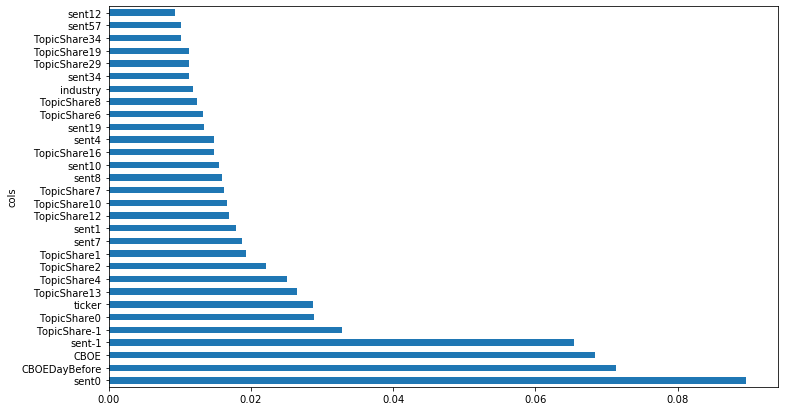

In [96]:
fi = FA.rf_feat_importance(rf_best, df_new)
FA.plot_fi(fi[:30])

In [97]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep) 

52

In [98]:
df_keep = df_new[to_keep]
df_keep.shape

(1950, 52)

#### Retrain the model with the reduced number of features

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df_keep, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((1560, 52), (1560,))

In [107]:
m = RandomForestRegressor(n_estimators=30, max_depth=10, max_features=0.5,
                          min_samples_leaf=7, n_jobs=-1)
m.fit(X_train, y_train)
#Evaluate the model
y_pred = m.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.5f}".format(mse))

Mean Squared Error: 0.00434


In [108]:
print_score(m) # despite reducing features, performance was improved

RMSE train: 0.05400, RMSE test: 0.06600, R2 train: 0.373, R2 test: 0.048


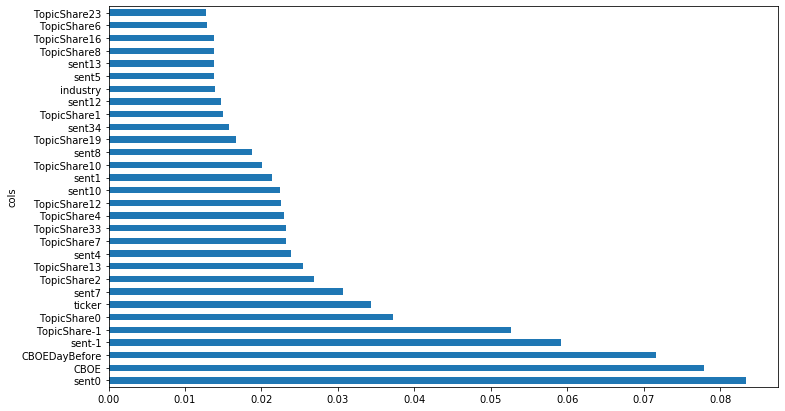

In [109]:
fi = FA.rf_feat_importance(m, df_keep)
FA.plot_fi(fi[:30])

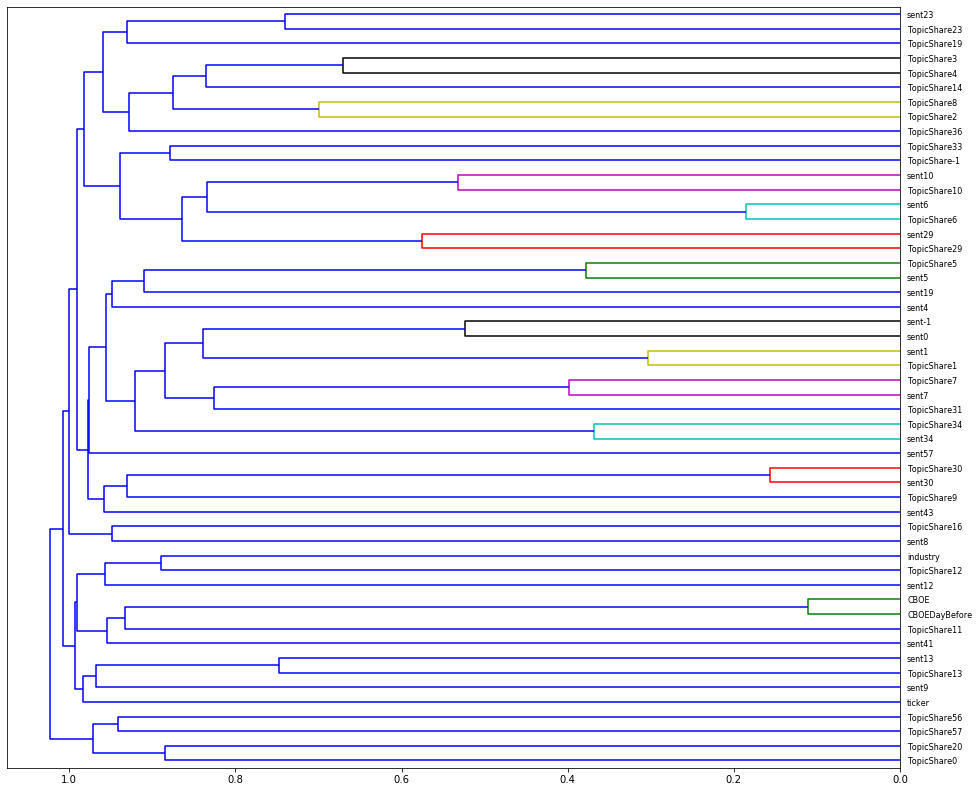

In [110]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,14))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, 
                           orientation='left', leaf_font_size=8)

In [111]:
col = fi['cols'].tolist()
col.append('Mkt_Reaction_Percent')
df_for_LR = df[col]
df_for_LR.shape

(1950, 53)

In [112]:
df_for_LR.to_pickle('df_for_LR')

---

### II. OLS, Lasso, and Ridge


In [114]:
df_new, y, nas, mapper = FA.proc_df(df=df_for_LR, y_fld='Mkt_Reaction_Percent', do_scale=True)
df_new.shape

(1950, 52)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((1560, 52), (1560,))

#### 1. OLS

In [116]:
m = LinearRegression().fit(X_train, y_train)
m.score(X_test, y_test)

0.0036833719650170016

In [117]:
m.score(X_train, y_train)

0.0763565906885979

In [118]:
preds = m.predict(X_test)
rmse(preds, y_test)

0.06741602568020068

In [119]:
y_std = y.std()
y_std 

0.06762044673371834

#### 2. Lasso

In [124]:
m = Lasso(alpha=0.001).fit(X_train, y_train)
m.score(X_test, y_test)

0.02609710457354808

In [125]:
rmse(m.predict(X_test), y_test)

0.06665339659786397

#### 3. Ridge

In [128]:
m = Ridge(alpha=0.001).fit(X_train, y_train)
m.score(X_test, y_test)

0.0036835025731130067

In [129]:
rmse(m.predict(X_test), y_test)

0.06741602126138502